# 03 Post processing precursors for restarts

This Jupyter Notebook gives an example to post process precursor files so as to restart it with or without OpenFAST turbines.
This notebook helps to create an AMR-Wind input file for restarting the precursor files

In [1]:
from moa_python.post_precursor import Post_precursor
import os
import numpy as np
%matplotlib notebook

In [2]:
precursor_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/precursor'
precursor_file = 'precursor.i'
stats_file = 'post_processing/abl_statistics00000.nc'
t_start = 7200
t_end = 10800
input_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/restart'
input_file = 'simulation.i'

In [3]:
abl_stats = Post_precursor(precursor_folder, stats_file, t_start, t_end)
abl_stats.read_input_file(input_file,input_folder,precursor_file)

ABL statistics file post_processing/abl_statistics00000.nc loaded succesfully.
Editing existing restart input file /projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/restart/simulation.i.


In [4]:
abl_stats.add_runtime_stats(input_file,input_folder,precursor_file)

Temperature file succesfully written to '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/restart/avg_theta.dat'.


<IPython.core.display.Javascript object>


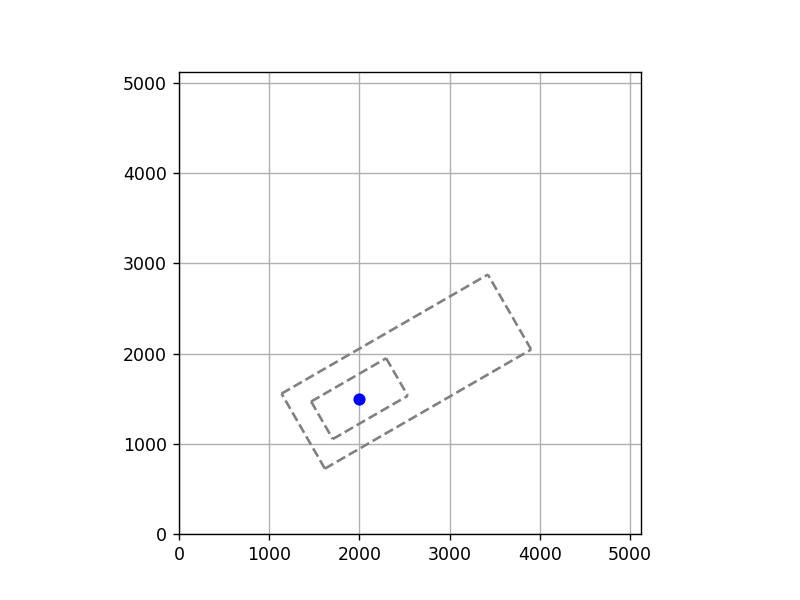

In [5]:
xbndry = [0, 5120]
ybndry = [0, 5120]
turb_loc = [2000, 1500, 0]
rot_diam = 240
hub_height = 150
angle = 30
abl_stats.define_flowfield_geo(xbndry, ybndry, turb_loc, rot_diam, hub_height, angle)

In [7]:
# Refinement around turbine
x_coor_0 = [-3, 8]
y_coor_0 = [-2, 2]
z_coor_0 = [0, 380]

x_coor_1 = [-2, 2]
y_coor_1 = [1, -1]
z_coor_1 = [0, 310]

abl_stats.clear_refinements()
abl_stats.add_box_refinement('level_0', x_coor_0, y_coor_0, z_coor_0, level=0)
abl_stats.add_box_refinement('level_1', x_coor_1, y_coor_1, z_coor_1, level=1)

In [8]:
abl_stats.generate_restart_input_file(input_file,input_folder)

TypeError: Post_precursor.general_precursor_to_restart() takes 1 positional argument but 2 were given

Maak aparte functie voor toevoegen io-params, aanpassen andere inputs, toevoegen turbine, etc
Daarna alles samenvoegen in functie generate_restart_input_file

In [9]:
abl_stats.add_refinements()

In [ ]:
abl_stats.precursor_to_restart(fixed_dt=0.05, bndry_file="../precursor/bndry_files", \
                               restart_file="../precursor/output_files/chk14400", periodicity=[0,0,0])

In [ ]:
import numpy as np
x_coor_0[0]*np.sqrt(3)/2

In [10]:
abl_stats.input_file

['#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨#\n',
 '#            SIMULATION STOP            #\n',
 '#.......................................#\n',
 'time.stop_time                           = 10800.0     # Max (simulated) time to evolve\n',
 'time.max_step                            = -1          # Max number of time steps\n',
 'time.fixed_dt                            = 0.5         # Use this constant dt if > 0\n',
 'time.cfl                                 = 0.95        # CFL factor\n',
 '\n',
 '#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨#\n',
 '#            INPUT AND OUTPUT           #\n',
 '#.......................................#\n',
 'time.plot_interval                       = 3600       # Steps between plot files\n',
 'time.checkpoint_interval                 = 3600       # Steps between checkpoint files\n',
 'io.check_file                            = "output_files/chk"\n',
 'io.plot_file                             = "output_files/plt"\n',
 'ABL.bndry_file                          